# Datorlabb 1 - ekvationslösning
Tanken är att vi ska lösa ekvationer numeriskt. Egentligen ska vi använda MATLAB men jag valde att slänga ihop allt i Python istället. 

Här importerar jag de nödvändiga biblioteken som kommer att användas under arbetet: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve as fzero

## Metoder
Här implementeras de metoder som kommer användas flera gånger under arbetet. 

### Newtons metod
Antag att $x_k$ är en approximation avett nollställe till ekvationen $f(x) = 0$. Följ tangenten i punkten $(x_k, f(x_k))$, dvs.

$$
y = f(x_k) + f'(x_k)(x-x_k)
$$

ned till $x$-axeln $(y=0)$ och tag skärningspunktens $x$-koordinat

$$
x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}
$$

som en ny approximation av nollstället. 

In [2]:
def newton(f, x, accuracy=5e-8):
    h = 1
    while abs(h) > accuracy:
        h = -f(x) / Df(f, x)
        x = x + h
    return x

### Funktion för numerisk beräkning av derivatan
Med hjälp av derivatans definition och ett $h = 10^{-5}$ så kan man få ett ungefär på en funktions derivata. 

Derivatans definition:
$$
f'(x)=\lim_{h \to 0} \frac{f(x + h) - f(x - h)}{2h}
$$

In [3]:
def Df(f, x, h=1e-8):
    return (f(x + h) - f(x - h)) / (2 * h)

## Uppgift 1
Rita grafen till
$$
f(x) = (x - 2.5)e^{-0.5(x-2)^2}+0.2
$$

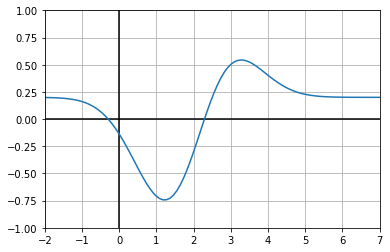

In [4]:
x = np.linspace(-2, 7, num=100)

def f(x):
    return (x - 2.5) * np.exp(-0.5 * ((x - 2) ** 2)) + 0.2

plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.grid(b=True)

plt.axis([-2, 7, -1, 1])
plt.plot(x, f(x))

plt.show()

## Uppgift 2
### a) Låt $a = -1$ och $b = 0$

In [5]:
(a, b) = (-1, 0)

### b) Undersök om $f$ växlar tecken på $[a, b]$ genom att bilda $f(a) \cdot f(b)$
Om $f(a) \cdot f(b) < 0$ så växlar funktionen tecken i intervallet $[a, b]$

In [6]:
print(np.sign(f(a) * f(b)))

-1.0


### c) Bilda mittpunkten $m$
$$
m = \frac{a + b}{2}
$$

In [7]:
m = (a + b) / 2

### d) Om $f$ växlar tecken på $[a, m]$, låt $b$ få värdet av $m$, annars låt $a$ få värdet av $m$

In [8]:
if f(a) * f(m) < 0:
    b = m
else:
    a = m

## Uppgift 3

In [9]:
def min_bisect(f, x_range, accuracy = 5e-6):
    (a, b) = x_range
    m = None

    if np.sign(f(a) * f(b)) > 0:
        print(f"Det finns ingen lösning på intervallet {a}<=x<={b}")
        return None

    m = 0
    while np.abs(m - (a + b) / 2) > accuracy:
        m = (a + b) / 2
        if np.sign(f(a) * f(m)) < 0:
            b = m
        else:
            a = m
    return m

## Uppgift 4

In [10]:
(a, b) = (-1, 0)
x1 = min_bisect(f, (a, b))

(a, b) = (2, 3)
x2 = min_bisect(f, (a, b))

print(f"f(x1) = {f(x1):0.5f} => x1 = {x1:0.5f}")
print(f"f(x2) = {f(x2):0.5f} => x2 = {x2:0.5f}")

f(x1) = 0.00000 => x1 = -0.29694
f(x2) = -0.00000 => x2 = 2.29133


## Uppgift 5 - Kastbana
$$
y(x) = y_{0} - \frac{g}{2v_{0}^2 \cos^2 \theta} \left( x - \frac{v_{0}^2 \sin(2 \theta)}{2g} \right)^2 + \frac{v_{0}^2 \sin^2 \theta}{2g}
$$

Där
$$
 y_0 = 1.85 m \\
 v_0 = 10 m/s \\
 \theta = 45^\circ
$$

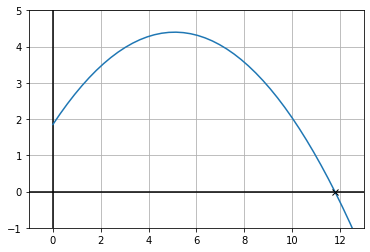

f(x) = 0.00001 => x = 11.79281


In [11]:
x = np.linspace(0, 30, num=100)

def f(x):
    y0 = 1.85
    v = 10
    g = 9.81
    theta = 45
    t = theta * np.pi / 180
    a = g / (2 * (v ** 2) * (np.cos(t) ** 2))
    b = (v ** 2) * np.sin(2 * t) / (2 * g)
    c = (v ** 2) * (np.sin(t) ** 2) / (2 * g)
    return y0 - a * ((x - b) ** 2) + c

plt.axis([-1, 13, -1, 5])
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.grid(b=True)
plt.plot(x, f(x))

(a, b) = (11, 12)
x = min_bisect(f, (a, b))

plt.plot(x, 0, "kx")

plt.show()

print(f"f(x) = {f(x):0.5f} => x = {x:0.5f}")

## Uppgift 6
Lös ekvationen

$$
f(x)=x^3-\cos(4x)=0
$$

med hjälp av Newtons metod

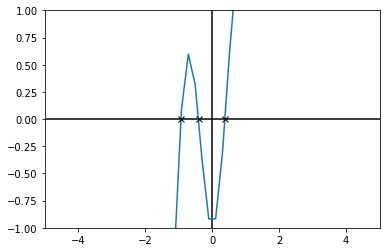

x1 = -0.93681, x2 = -0.40993, x3 = 0.37907


In [12]:
x = np.linspace(-5, 5)

def f(x):
    return x ** 3 - np.cos(4 * x)

plt.axis([-5, 5, -1, 1])
plt.axhline(color="black")
plt.axvline(color="black")
plt.plot(x, f(x))

x1 = newton(f, -1)
x2 = newton(f, -0.5)
x3 = newton(f, 0.5)

plt.plot(x1, 0, "kx")
plt.plot(x2, 0, "kx")
plt.plot(x3, 0, "kx")

plt.show()

print(f"x1 = {x1:0.5f}, x2 = {x2:0.5f}, x3 = {x3:0.5f}")

## Uppgift 7
Se Newtons metod ovan

## Uppgift 8
### a) Lös ekvationen $ f(x)=0.5(x-2)^2-2 \cos(2x)-1.5=0 $

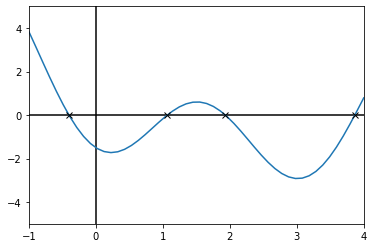

x1 = -0.40254, x2 = 1.06576, x3 = 1.93301, x4 = 3.86641


In [13]:
def f(x):
    return 0.5 * ((x - 2) ** 2) - 2 * np.cos(2 * x) - 1.5

x = np.linspace(-1, 4)

plt.axis([-1, 4, -5, 5])
plt.axhline(color="black")
plt.axvline(color="black")
plt.plot(x, f(x))

x1 = newton(f, -0.5)
x2 = newton(f, 1)
x3 = newton(f, 2)
x4 = newton(f, 3.5)

plt.plot(x1, 0, "kx")
plt.plot(x2, 0, "kx")
plt.plot(x3, 0, "kx")
plt.plot(x4, 0, "kx")

plt.show()

print(f"x1 = {x1:0.5f}, x2 = {x2:0.5f}, x3 = {x3:0.5f}, x4 = {x4:0.5f}")

### b) Lös ekvationen $ f(x) = x^3-\cos(4x)=0 $

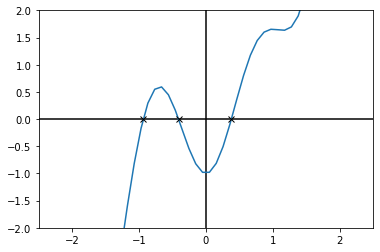

x1 = -0.93681, x2 = -0.40993, x3 = 0.37907


In [14]:
def f(x):
    return x ** 3 - np.cos(4*x)

x = np.linspace(-2.5, 2.5)

plt.axis([-2.5, 2.5, -2, 2])
plt.axhline(color="black")
plt.axvline(color="black")
plt.plot(x, f(x))

x1 = newton(f, -1)
x2 = newton(f, -0.5)
x3 = newton(f, 0.5)

plt.plot(x1, 0, "kx")
plt.plot(x2, 0, "kx")
plt.plot(x3, 0, "kx")

plt.show()

print(f"x1 = {x1:0.5f}, x2 = {x2:0.5f}, x3 = {x3:0.5f}")

## Uppgift 9
Lös 

$$
f(x) = \frac{3 + \sin(2x)}{1 + e^{0.03x^2}}-1.2 = 0
$$

med fzero (även kallad fsolve)

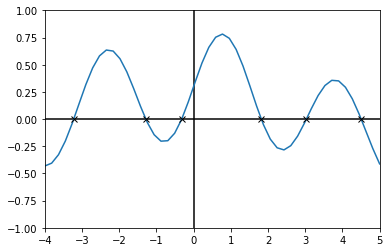

x1 = -3.22262, x2 = -1.28621, x3 = -0.31945, x4 = 1.81821, x5 = 3.03111, x6 = 4.50377


In [15]:
def f(x):
    return (3 + np.sin(2 * x)) / (1 + np.exp(0.03 * (x ** 2))) - 1.2

x = np.linspace(-4, 5)

plt.axis([-4, 5, -1, 1])
plt.axhline(color="black")
plt.axvline(color="black")
plt.plot(x, f(x))

x0 = [-3, -1.5, -0.3, 1.7, 3, 4.5]
xs = fzero(f, x0)

output = ""
i = 0
for x in xs:
    i += 1
    plt.plot(x, 0, "kx")
    output += f"x{i} = {x:0.5f}, "

plt.show()

print(output[0:-2])